# Đồ án Cuối Kỳ 
 Môn __Nhập môn khoa học dữ liệu__
 
 Khái quát về dự án (Tiếng Anh): https://github.com/cstotodile/ds_final/blob/main/README.md
 
## Danh sách nhóm:

No. 15

18120184 - Nguyễn Nguyên Khang

18120189 - Trần Đăng Khoa


Task | Assigned
------------ | -------------
Data Crawler |  Nguyễn Nguyên Khang
Data Exploration & Preprocessing |  Nguyễn Nguyên Khang, Trần Đăng Khoa (hỗ trợ)
Data Modeling (Train models and review them) |  Trần Đăng Khoa
Notebook & Github Readme.md | Nguyễn Nguyên Khang & Trần Đăng Khoa

# Mục lục
- [Thu thập dữ liệu](#Thu-thập-dữ-liệu)
- [Khám phá dữ liệu và Tiền Xử lý](#Khám-phá-dữ-liệu-và-Tiền-Xử-lý)
  - [Dữ liệu](#Dữ-liệu)
  - [Câu hỏi đặt ra](#Câu-hỏi-đặt-ra)
  - [Mở file và chỉnh sửa thông số hiển thị](#Mở-file-và-chỉnh-sửa-thông-số-hiển-thị)
  - [Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#Mỗi-dòng-có-ý-nghĩa-gì?-Có-vấn-đề-các-dòng-có-ý-nghĩa-khác-nhau-không?)
  - [Xử lý giá trị trùng lặp](#Xử-lý-giá-trị-trùng-lặp)   
  - [Xử lý khác biệt ngữ nghĩa do parse data từ json](#Xử-lý-khác-biệt-ngữ-nghĩa-do-parse-data-từ-json)
  - [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số)
  - [Phân bố giá trị của cột có kiểu dữ liệu dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-dạng-số)
  - [Xử lý dữ liệu thiếu](#Xử-lý-dữ-liệu-thiếu)
  - [Xử lý kiểu dữ liệu cột](#Xử-lý-kiểu-dữ-liệu-cột)
  - [Xử lý giá trị không hợp lệ](#Xử-lý-giá-trị-không-hợp-lệ)
  - [Tách các tập](#Tách-các-tập) 
  - [Tiền xử lý cột name, shop_location và chuẩn hóa dữ liệu](#Tiền-xử-lý-cột-name,-shop_location-và-chuẩn-hóa-dữ-liệu)

## Thu thập dữ liệu

Toàn bộ phần thu thập dữ liệu được nhóm đặt trong thư mục _Data Crawler_ và quá trình làm việc trong branch [_develope-Al27_](https://github.com/cstotodile/ds_final/tree/develope-Al27)

## Khám phá dữ liệu và Tiền Xử lý

## (Exploring Data & PreProcessing Data)

Quá trình làm việc của nhóm trong branch [Preprocessing](https://github.com/cstotodile/ds_final/tree/Preprocessing)


### Dữ liệu

Các món hàng _Thời trang nam_ trên shopee

Input là các thuộc tính của món hàng mà được biểu hiện ra trên giao diện của shopee.vn cho người dùng thấy, và thuộc tính thời gian của món hàng bao gồm: Thời gian sản phẩm được đăng, thời gian sản phẩm được lấy dữ liệu về máy, và thời gian sản phẩm được bày bán

Output là số lượng hàng đã bán được trong thời gian món hàng được đăng lên shopee cho đến lúc được lấy dữ liệu về máy

Dữ liệu đúng vì được request từ api của shopee, có nghĩa là shopee cũng đang sử dụng dữ liệu này để hiện thị cho người tiêu dùng xem.

### Câu hỏi đặt ra

Dự đoán số lượng hàng bán được của một sản phẩm _Thời trang Nam_ tại một thời điểm trên shopee.vn



### Import 

import trước các thư viện re, numpy, pandas, sklearn

In [138]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline
# from sklearn.cross_validation import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

### Mở file và chỉnh sửa thông số hiển thị

Do dataset hiện đang nằm ở nhiều file khác nhau do có category khác nhau nên ta tiến hành gộp data bằng lệnh concat của pandas.

In [3]:
#Set Option
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

 - Mở file
 
  Thử mở file thuộc danh mục _Áo ngắn tay không cổ_ và đánh giá qua về data trước khi gộp

In [4]:
aoNganTayKhongCo_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_aoNganTayKhongCo_0-949.tsv', sep='\t')
aoNganTayKhongCo_df.head()

,name,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discoun,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
0,Áo thun phông Unisex nam nữ 2 màu Trắng Đen tay ngắn cổ tròn dáng ôm phối cực cá tính - V107,TP. Hồ Chí Minh,1607316973,1609949428,2632455,True,39%,False,8,False,5.000000,4,0,0,0,0,None,None,14900000000,24500000000,14900000000,24500000000,14900000000,24500000000,None,7,1048,4,True,False,8,0,18
1,Áo Thun Trơn Nam [FREESHIP] Áo phông nam tay ngắn 100% cotton Trắng Đen dáng ôm vừa vặn AT01,TP. Hồ Chí Minh,1596338054,1609949428,13611374,True,49%,False,35,False,4.947977,166,5,2,0,0,None,None,10900000000,10900000000,10900000000,21500000000,10900000000,10900000000,None,109,10540,173,True,False,9,0,526
2,"[SALE 50%] - Áo Thun Nam Cổ Tròn Cao Cấp ( nhiều màu) Tay Ngắn, chất cotton bề mặt vải mềm Mịn cực hot",TP. Hồ Chí Minh,1603987674,1609949428,5961754,True,50%,False,48,False,4.885417,89,4,2,1,0,None,None,4950000000,9900000000,4950000000,9900000000,4950000000,9900000000,None,25,4025,96,True,False,9,0,431
3,Áo thun nam unisex 100% cotton basic Trắng Đen áo phông co giãn cao cấp dáng rộng dễ phối đồ - V69,TP. Hồ Chí Minh,1596082707,1609949428,13866721,True,39%,False,8,False,5.000000,66,0,0,0,0,None,None,14900000000,24500000000,14900000000,24500000000,14900000000,24500000000,None,85,4551,66,True,False,7,0,141
4,🔥XẢ HÀNG🔥 Áo đôi - áo cặp nam nữ dễ thương cực HOT,Hà Nội,1590391265,1609949428,19558163,False,None,False,10,False,4.687500,27,1,3,1,0,None,None,7200000000,-1,7200000000,-1,7200000000,0,None,128,3613,32,False,False,1,0,158


Ta thấy ngay cột `name` nếu sử dụng chiến lược _Bag of Words_ thì sẽ tăng số lượng cột lên rất nhiều, dễ gây overfitting. Tuy nhiên trong cột name vẫn mang rõ đặc trưng của nhóm hàng này là _Áo ngắn tay không cổ_.

Vậy trước khi gộp chung vào thành 1 dataset lớn, ta sẽ thêm vào data frame cột `category` để xác định món hàng đó thuộc nhóm nào, và bỏ cột `name` đi.

In [5]:
def removeNameAddCategory(df, category):
    df = df.reindex(columns = ['category'] + df.columns.tolist())
    df['category'] = df['category'].fillna(category)
    df = df.drop('name', axis = 1)
    return df

In [6]:
aoNganTayKhongCo_df = removeNameAddCategory(aoNganTayKhongCo_df, category = 'Ao ngan tay khong co')
aoNganTayKhongCo_df.head(3)

,category,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discoun,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
0,Ao ngan tay khong co,TP. Hồ Chí Minh,1607316973,1609949428,2632455,True,39%,False,8,False,5.000000,4,0,0,0,0,None,None,14900000000,24500000000,14900000000,24500000000,14900000000,24500000000,None,7,1048,4,True,False,8,0,18
1,Ao ngan tay khong co,TP. Hồ Chí Minh,1596338054,1609949428,13611374,True,49%,False,35,False,4.947977,166,5,2,0,0,None,None,10900000000,10900000000,10900000000,21500000000,10900000000,10900000000,None,109,10540,173,True,False,9,0,526
2,Ao ngan tay khong co,TP. Hồ Chí Minh,1603987674,1609949428,5961754,True,50%,False,48,False,4.885417,89,4,2,1,0,None,None,4950000000,9900000000,4950000000,9900000000,4950000000,9900000000,None,25,4025,96,True,False,9,0,431


Ta xử lý tương tự cho các dataset còn lại

In [7]:
aoSoMi_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_aoSoMi_0-949.tsv', sep='\t')
baloTuiVi_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_baloTuiVi_0-949.tsv', sep='\t')
giayDepNam_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_giayDepNam_0-949.tsv', sep='\t')
phuKienNam_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_phuKienNam_0-949.tsv', sep='\t')
Quan_df = pd.read_csv('Data/ShoppeItem_thoiTrangNam_Quan_0-949.tsv', sep='\t')

aoSoMi_df = removeNameAddCategory(aoSoMi_df, category = 'Ao so mi')
baloTuiVi_df = removeNameAddCategory(baloTuiVi_df, category = 'Balo/ Tui/ Vi')
giayDepNam_df = removeNameAddCategory(giayDepNam_df, category = 'Giay dep nam')
phuKienNam_df = removeNameAddCategory(phuKienNam_df, category = 'Phu kien Nam')
Quan_df = removeNameAddCategory(Quan_df, category = 'Quan')

Tiếp theo, ta tiến hành gộp các dataset này lại với nhau

In [8]:
frames = [aoNganTayKhongCo_df,aoSoMi_df,baloTuiVi_df,giayDepNam_df,phuKienNam_df,Quan_df]

items_df = pd.concat(frames, ignore_index=True, sort=False)

# Sử dụng lệnh dưới thay vì lệnh đang dùng ở phía trên, các dataframe được gộp với nhau 
# nhưng vẫn có thể gọi riêng một dataframe thông qua key.
# Trường hợp này ta có thể áp dụng gộp rồi mới thêm cột category
# Tuy nhiên chỉ số index sẽ không chạy từ 0 đến hết mà giữ nguyên ở mỗi bảng.

# items_df = pd.concat(frames, keys = [aoNganTayKhongCo', 'aoSoMi', 'baloTuiVi', 'giayDepNam', 'phuKienNam', 'Quan'])

In [9]:
items_df

,category,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discoun,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
0,Ao ngan tay khong co,TP. Hồ Chí Minh,1.607317e+09,1.609949e+09,2632455.0,True,39%,False,8.0,False,5.000000,4.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,7.0,1048.0,4.0,True,False,8.0,0.0,18.0
1,Ao ngan tay khong co,TP. Hồ Chí Minh,1.596338e+09,1.609949e+09,13611374.0,True,49%,False,35.0,False,4.947977,166.0,5.0,2.0,0.0,0.0,None,None,1.090000e+10,1.090000e+10,1.090000e+10,2.150000e+10,1.090000e+10,1.090000e+10,None,109.0,10540.0,173.0,True,False,9.0,0.0,526.0
2,Ao ngan tay khong co,TP. Hồ Chí Minh,1.603988e+09,1.609949e+09,5961754.0,True,50%,False,48.0,False,4.885417,89.0,4.0,2.0,1.0,0.0,None,None,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,None,25.0,4025.0,96.0,True,False,9.0,0.0,431.0
3,Ao ngan tay khong co,TP. Hồ Chí Minh,1.596083e+09,1.609949e+09,13866721.0,True,39%,False,8.0,False,5.000000,66.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,85.0,4551.0,66.0,True,False,7.0,0.0,141.0
4,Ao ngan tay khong co,Hà Nội,1.590391e+09,1.609949e+09,19558163.0,False,None,False,10.0,False,4.687500,27.0,1.0,3.0,1.0,0.0,None,None,7.200000e+09,-1.000000e+00,7.200000e+09,-1.000000e+00,7.200000e+09,0.000000e+00,None,128.0,3613.0,32.0,False,False,1.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,Quan,Hà Nội,1.581356e+09,1.609992e+09,28635448.0,True,47%,False,18.0,False,4.857143,6.0,1.0,0.0,0.0,0.0,None,None,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,None,4.0,35.0,7.0,False,True,8.0,0.0,14.0
5747,Quan,Hà Nội,1.597771e+09,1.609992e+09,12220879.0,True,47%,False,6.0,False,5.000000,2.0,0.0,0.0,0.0,0.0,None,None,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,None,0.0,40.0,2.0,True,False,9.0,0.0,4.0
5748,Quan,Nước ngoài,1.570801e+09,1.609992e+09,39190550.0,False,48%,False,0.0,False,5.000000,1.0,0.0,0.0,0.0,0.0,None,None,4.742400e+09,9.120000e+09,4.742400e+09,9.120000e+09,4.742400e+09,9.120000e+09,None,4.0,12.0,1.0,False,True,9.0,0.0,2.0
5749,Quan,TP. Hồ Chí Minh,1.552326e+09,1.609992e+09,57665762.0,True,22%,False,3.0,False,4.833333,22.0,1.0,0.0,1.0,0.0,None,None,8.500000e+09,1.090000e+10,8.500000e+09,1.090000e+10,8.500000e+09,1.090000e+10,None,4965.0,13.0,24.0,False,True,6.0,0.0,49.0


Thử kiểm tra lại thông số về số mẫu và số thuộc tính của dataset

In [10]:
items_df.shape

(5751, 33)

In [11]:
items_df.columns.values

array(['category', 'shop_location', 'item_public_time',
       'item_be_got_time', 'sell_time', 'shopee_verified', 'discount',
       'is_adult', 'options', 'show_official_shop_label_in_title',
       'rating_star', 'five_star', 'four_star', 'three_star', 'two_star',
       'one_star', 'flash_sale', 'upcoming_flash_sale', 'price_min',
       'price_min_before_discoun', 'price_max',
       'price_max_before_discount', 'price', 'price_before_discount',
       'coin_earn_label', 'liked_count', 'view_count', 'cmt_count',
       'is_preferred_plus_seller', 'show_free_shipping', 'images',
       'video_info_list', 'historical_sold'], dtype=object)

Sau khi kiểm tra, ta tiến hành lưu lại dữ liệu đã gộp

In [12]:
items_df.to_csv('Data/ShoppeItem_full.tsv', sep = '\t', index=False)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu và qua quá trình crawler data, ta thấy mỗi dòng chứa thông tin của một món hàng, và không có vấn đề các dòng có ý nghĩa khác nhau.

### Xử lý giá trị trùng lặp

Trước tiên, ta xem thử có bao nhiều dòng bị lặp giá trị

In [13]:
num_duplicated_rows = items_df.duplicated().sum()
num_duplicated_rows

40

Xóa các dòng có giá trị lặp bằng phương thức drop_duplicates của pandas, mặc định dữ lại dòng có giá trị lặp đầu tiên 

In [14]:
items_df = items_df.drop_duplicates(ignore_index = True)
items_df.shape

(5711, 33)

### Xử lý khác biệt ngữ nghĩa do parse data từ json

Do dữ liệu trả về từ api của shopee, những dữ liệu thiếu có dạng string: 'None' nên pandas sẽ không đếm được lượng dữ liệu __không có giá trị__ này. Ta tiến hành thay 'None' thành pd.NA để có thể đếm lượng dữ liệu thiếu này chính xác.

In [15]:
# cond = items_df != 'None'
# items_df.where(cond, pd.NA)
items_df = items_df.replace('None', pd.NA)

In [16]:
# Do lỗi trong quá trình crawler nên tên cột price_min_before_discount bị thiếu chữ t, ta sửa lại ở dưới

items_df = items_df.rename(columns={'price_min_before_discoun': 'price_min_before_discount'})
items_df['price_min_before_discount']

0       2.450000e+10
1       1.090000e+10
2       9.900000e+09
3       2.450000e+10
4      -1.000000e+00
            ...     
5706    1.290000e+10
5707    1.290000e+10
5708    9.120000e+09
5709    1.090000e+10
5710    5.800000e+09
Name: price_min_before_discount, Length: 5711, dtype: float64

### Phân bố giá trị của cột có kiểu dữ liệu dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Kết quả được lưu vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" 

In [17]:
df = items_df.select_dtypes(exclude='object')
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
num_col_info_df = df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
num_col_info_df

,item_public_time,item_be_got_time,sell_time,options,rating_star,five_star,four_star,three_star,two_star,one_star,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,images,video_info_list,historical_sold
missing_ratio,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
min,1.455984e+09,1.609910e+09,54304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.900000e+08,-1.000000e+00,3.900000e+08,-1.000000e+00,3.900000e+08,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0
lower_quartile,1.581799e+09,1.609917e+09,4364561.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.900000e+09,-1.000000e+00,9.900000e+09,-1.000000e+00,9.900000e+09,0.000000e+00,0.0,0.0,0.0,5.0,0.0,0.0
median,1.597195e+09,1.609949e+09,12754241.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.680000e+10,6.000000e+09,1.700000e+10,6.605000e+09,1.680000e+10,6.000000e+09,0.0,0.0,0.0,8.0,0.0,0.0
upper_quartile,1.605597e+09,1.609992e+09,28162952.2,15.0,4.7,1.0,0.0,0.0,0.0,0.0,2.850000e+10,2.500000e+10,2.990000e+10,2.500000e+10,2.850000e+10,2.500000e+10,7.0,27.8,1.0,9.0,0.0,3.0
max,1.609856e+09,1.609994e+09,153926683.0,80.0,5.0,7869.0,777.0,427.0,199.0,462.0,6.900000e+11,2.680000e+11,6.900000e+11,2.680000e+11,6.900000e+11,2.680000e+11,79919.0,189252.0,9737.0,9.0,1.0,37079.0


### Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 

- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

Kết quả được lưu vào DataFrame `cat_col_info_df`, trong đó: 

- Tên của các cột là tên của các cột không phải số trong `items_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

In [18]:

# pd.set_option('display.max_colwidth', 200) 
df = items_df.select_dtypes(include='object')
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,category,shop_location,shopee_verified,discount,is_adult,show_official_shop_label_in_title,flash_sale,upcoming_flash_sale,coin_earn_label,is_preferred_plus_seller,show_free_shipping
missing_ratio,0,1,0,47.3,0,1.1,100,100,100,0,0
num_values,6,46,2,56,3,5,1,1,1,2,2
value_ratios,"{'Ao ngan tay khong co': 17.3, 'Balo/ Tui/ Vi': 16.6, 'Quan': 16.6, 'Giay dep nam': 16.6, 'Ao so mi': 16.5, 'Phu kien Nam': 16.4}","{'Hà Nội': 37.7, 'Nước ngoài': 35.6, 'TP. Hồ Chí Minh': 19.0, 'Bình Dương': 0.8, 'Hải Dương': 0.8, 'Bình Định': 0.7, 'Hưng Yên': 0.5, 'Đồng Nai': 0.4, 'Quảng Ninh': 0.4, 'Hà Nam': 0.4, 'Phú Thọ': 0.3, 'Ninh Bình': 0.2, 'Hải Phòng': 0.2, 'Thái Bình': 0.2, 'Khánh Hòa': 0.2, 'Bình Thuận': 0.2, 'Bắc Ninh': 0.2, 'Lào Cai': 0.2, 'Thừa Thiên Huế': 0.2, 'Lạng Sơn': 0.2, 'Hòa Bình': 0.1, 'Đà Nẵng': 0.1, 'Lâm Đồng': 0.1, 'Nam Định': 0.1, 'Thái Nguyên': 0.1, 'Thanh Hóa': 0.1, 'Bắc Kạn': 0.1, 'Cần Thơ': 0.1, 'Vĩnh Phúc': 0.1, 'Bắc Giang': 0.1, 'Kon Tum': 0.1, 'Bà Rịa - Vũng Tàu': 0.1, 'Sóc Trăng': 0.1, 'Phú Yên': 0.1, 'Đồng Tháp': 0.1, 'Nghệ An': 0.1, 'Đắk Lắk': 0.0, 'Bến Tre': 0.0, 'Tiền Giang': 0.0, 'Hà Tĩnh': 0.0, 'Ninh Thuận': 0.0, 'Cao Bằng': 0.0, 'Quảng Ngãi': 0.0, 'Vĩnh Long': 0.0, 'Cà Mau': 0.0}","{False: 83.4, True: 16.6}","{'50%': 20.9, '40%': 6.0, '30%': 4.7, '49%': 4.5, '20%': 4.0, '45%': 3.5, '48%': 3.5, '41%': 3.2, '47%': 3.1, '1%': 3.1, '46%': 2.7, '25%': 2.6, '35%': 2.6, '44%': 2.5, '43%': 2.3, '38%': 2.1, '34%': 2.0, '29%': 1.9, '10%': 1.8, '39%': 1.7, '42%': 1.5, '31%': 1.5, '36%': 1.5, '19%': 1.3, '28%': 1.2, '26%': 1.1, '37%': 1.1, '15%': 1.1, '33%': 1.0, '21%': 1.0, '23%': 0.9, '5%': 0.9, '27%': 0.8, '32%': 0.8, '22%': 0.7, '24%': 0.7, '18%': 0.6, '17%': 0.5, '14%': 0.5, '7%': 0.5, '16%': 0.4, '13%': 0.4, '12%': 0.3, '2%': 0.3, '8%': 0.2, '9%': 0.2, '11%': 0.2, '4%': 0.1, '56%': 0.1, '3%': 0.1, '6%': 0.1, '87%': 0.0, '61%': 0.0, '60%': 0.0, '51%': 0.0}","{False: 83.6, 'False': 16.4}","{False: 66.0, 'False': 31.7, True: 1.8, 'True': 0.5}",{},{},{},"{False: 97.4, True: 2.6}","{False: 77.8, True: 22.2}"


### Xử lý dữ liệu thiếu

In [19]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   category                           5711 non-null   object 
 1   shop_location                      5656 non-null   object 
 2   item_public_time                   5710 non-null   float64
 3   item_be_got_time                   5710 non-null   float64
 4   sell_time                          5710 non-null   float64
 5   shopee_verified                    5710 non-null   object 
 6   discount                           3010 non-null   object 
 7   is_adult                           5709 non-null   object 
 8   options                            5710 non-null   float64
 9   show_official_shop_label_in_title  5647 non-null   object 
 10  rating_star                        5710 non-null   float64
 11  five_star                          5710 non-null   float

Nhận xét:

1. Ta thấy 3 thuộc tính flash_sale, upcoming_flash_sale, coin_earn_label đều bị thiếu toàn bộ dữ liệu (0 non-null) nên vô nghĩa, ta tiến hành xóa bỏ ba thuộc tính này khỏi dataset.

2. Ta lại thấy có một mẫu bị thiếu tất cả dữ liệu trừ thuộc tính name, tiến hành xóa mẫu này.

Để đơn giản, ta có thể dùng phương thức dropna của pandas để xóa các dòng và cột bị thiếu toàn bộ dữ liệu:

1. Truyền tham số how = 'all' và axis = 1  cho cột

2. Truyền tham số thresh = 15 (những mẫu thiếu từ 15 thuộc tính) và axis = 0 cho dòng.

In [20]:
items_df = items_df.dropna(axis = 0, thresh = 15)
items_df = items_df.dropna(axis = 1, how = 'all')

In [21]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5710 entries, 0 to 5710
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   category                           5710 non-null   object 
 1   shop_location                      5656 non-null   object 
 2   item_public_time                   5710 non-null   float64
 3   item_be_got_time                   5710 non-null   float64
 4   sell_time                          5710 non-null   float64
 5   shopee_verified                    5710 non-null   object 
 6   discount                           3010 non-null   object 
 7   is_adult                           5709 non-null   object 
 8   options                            5710 non-null   float64
 9   show_official_shop_label_in_title  5647 non-null   object 
 10  rating_star                        5710 non-null   float64
 11  five_star                          5710 non-null   float

Kiểm tra lại ta thấy thuộc tính discount gần như có một nửa giá trị bị _thiếu_. Kiểm tra đối chiếu với các item trên shopee, ta thấy thực tế những mẫu bị _thiếu_ dữ liệu ở thuộc tính discount là do không có giảm giá (discount = 0). Ta tiến hành sửa bằng cách thay giá trị NA tại cột này thành 0.

In [22]:
items_df['discount'] = items_df['discount'].fillna(0)

In [23]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5710 entries, 0 to 5710
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   category                           5710 non-null   object 
 1   shop_location                      5656 non-null   object 
 2   item_public_time                   5710 non-null   float64
 3   item_be_got_time                   5710 non-null   float64
 4   sell_time                          5710 non-null   float64
 5   shopee_verified                    5710 non-null   object 
 6   discount                           5710 non-null   object 
 7   is_adult                           5709 non-null   object 
 8   options                            5710 non-null   float64
 9   show_official_shop_label_in_title  5647 non-null   object 
 10  rating_star                        5710 non-null   float64
 11  five_star                          5710 non-null   float

Đến đây ta thấy: 

1. Cột is_adult có một vài mẫu bị _thiếu_ dữ liệu (xấp xỉ 0% theo [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số)) 
  - Do số lượng mẫu thiếu dữ liệu ít 
  - -> Vậy nên ta có thể xóa những mẫu này.
2. Thuộc tính show_official_shop_label_in_title _thiếu_ 1.1% (theo [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số)).

  - Do số lượng mẫu thiếu dữ liệu ít 
  - -> Vậy nên ta có thể xóa những mẫu này.

3. Thuộc tính shop_location _thiếu_ 1% (theo [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số))

  - Ta có thể xóa các mẫu bị thiếu dữ liệu như 2 thuộc tính trên nhưng ta sẽ thử xử lý ở thuộc tính này thay vì xóa hẳn.

  - Lưu ý rằng các dữ liệu này vẫn hoạt động tốt trên shopee nên ta dùng lệnh sau để xem những mẫu nào bị _thiếu_ và đối chiếu với trên shopee.
```python
items_df['shop_location'] = items_df['shop_location'].replace(pd.NA, 'None')
items_df.loc[items_df['shop_location'] == 'None']
```

Sau khi đối chiếu ta được kết quả sau: 

Mẫu không thiếu:

![shop_location_not_missing_value](images/shop_location_not_missing_value.jpg)

Mẫu thiếu:

![shop_location_missing_value](images/shop_location_missing_value.jpg)

Tức là những mẫu có thuộc tính shop_location thiếu sẽ không hiển thị vị trí shop ở góc dưới.

Vậy ta sẽ xử lý bằng cách thay các giá trị thiếu này thành chuỗi "None".



In [24]:
items_df = items_df.dropna(subset = ['is_adult', 'show_official_shop_label_in_title'])

In [25]:
items_df['shop_location'] = items_df['shop_location'].replace(pd.NA, 'None')
items_df.loc[items_df['shop_location'] == 'None']

,category,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
701,Ao ngan tay khong co,None,1.608700e+09,1.609949e+09,1249018.0,False,0,False,1.0,False,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e+10,-1.0,5.000000e+10,-1.0,5.000000e+10,0.0,0.0,3.0,0.0,False,False,1.0,0.0,0.0
1111,Ao so mi,None,1.609141e+09,1.609949e+09,808406.0,False,0,False,6.0,False,0.0,0.0,0.0,0.0,0.0,0.0,8.201000e+09,-1.0,8.201000e+09,-1.0,8.201000e+09,0.0,0.0,1.0,0.0,False,False,2.0,0.0,0.0
1435,Ao so mi,None,1.609141e+09,1.609949e+09,808836.0,False,0,False,9.0,False,0.0,0.0,0.0,0.0,0.0,0.0,9.063000e+09,-1.0,9.063000e+09,-1.0,9.063000e+09,0.0,0.0,1.0,0.0,False,False,7.0,0.0,0.0
1490,Ao so mi,None,1.590679e+09,1.609949e+09,19270053.0,False,0,False,8.0,False,0.0,0.0,0.0,0.0,0.0,0.0,2.500000e+10,-1.0,2.500000e+10,-1.0,2.500000e+10,0.0,0.0,0.0,0.0,False,False,1.0,0.0,0.0
1795,Ao so mi,None,1.590679e+09,1.609949e+09,19270077.0,False,0,False,8.0,False,0.0,0.0,0.0,0.0,0.0,0.0,2.500000e+10,-1.0,2.500000e+10,-1.0,2.500000e+10,0.0,0.0,1.0,0.0,False,False,1.0,0.0,0.0
2370,Balo/ Tui/ Vi,None,1.607187e+09,1.609994e+09,2807274.0,False,0,False,5.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.694000e+10,-1.0,1.694000e+10,-1.0,1.694000e+10,0.0,0.0,0.0,0.0,False,False,9.0,0.0,0.0
2375,Balo/ Tui/ Vi,None,1.607187e+09,1.609994e+09,2807280.0,False,0,False,5.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.694000e+10,-1.0,1.694000e+10,-1.0,1.694000e+10,0.0,0.0,0.0,0.0,False,False,9.0,0.0,0.0
2638,Balo/ Tui/ Vi,None,1.607187e+09,1.609994e+09,2807249.0,False,0,False,5.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.694000e+10,-1.0,1.694000e+10,-1.0,1.694000e+10,0.0,0.0,0.0,0.0,False,False,9.0,0.0,0.0
2671,Balo/ Tui/ Vi,None,1.607187e+09,1.609994e+09,2807256.0,False,0,False,5.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.694000e+10,-1.0,1.694000e+10,-1.0,1.694000e+10,0.0,0.0,0.0,0.0,False,False,9.0,0.0,0.0
2753,Balo/ Tui/ Vi,None,1.607187e+09,1.609994e+09,2807268.0,False,0,False,5.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.694000e+10,-1.0,1.694000e+10,-1.0,1.694000e+10,0.0,0.0,0.0,0.0,False,False,9.0,0.0,0.0


In [26]:
# Kiểm tra lại thấy không còn dữ liệu thiếu nữa

items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5647 entries, 0 to 5710
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   category                           5647 non-null   object 
 1   shop_location                      5647 non-null   object 
 2   item_public_time                   5647 non-null   float64
 3   item_be_got_time                   5647 non-null   float64
 4   sell_time                          5647 non-null   float64
 5   shopee_verified                    5647 non-null   object 
 6   discount                           5647 non-null   object 
 7   is_adult                           5647 non-null   object 
 8   options                            5647 non-null   float64
 9   show_official_shop_label_in_title  5647 non-null   object 
 10  rating_star                        5647 non-null   float64
 11  five_star                          5647 non-null   float

### Xử lý kiểu dữ liệu cột

Cột `category` ta sẽ xử lý bằng phương pháp _One Hot_

Cột `shop_location` ta chỉ lấy 3 location có số mẫu nhiều nhất, còn lại để là _Others_. Sau đó ta sẽ tiếp tục xử lý cột này bàng phương pháp _One Hot_

Cột `discount` chuyển thành dạng `float`

Cột `shopee_verified`, `is_adult`, `show_official_shop_label_in_title`, `is_preferred_plus_seller `, `show_free_shipping` chuyển thành dạng 1, 0



In [27]:
# Xem lại kiểu dữ liệu các cột
items_df.dtypes

category                              object
shop_location                         object
item_public_time                     float64
item_be_got_time                     float64
sell_time                            float64
shopee_verified                       object
discount                              object
is_adult                              object
options                              float64
show_official_shop_label_in_title     object
rating_star                          float64
five_star                            float64
four_star                            float64
three_star                           float64
two_star                             float64
one_star                             float64
price_min                            float64
price_min_before_discount            float64
price_max                            float64
price_max_before_discount            float64
price                                float64
price_before_discount                float64
liked_coun

#### Xử lý cột `shop_location`

In [28]:
shop_location_count = items_df['shop_location'].value_counts()
shop_location_count

Hà Nội               2135
Nước ngoài           1991
TP. Hồ Chí Minh      1075
Bình Dương             47
Hải Dương              44
Bình Định              40
Hưng Yên               27
Đồng Nai               25
Quảng Ninh             25
Hà Nam                 22
Phú Thọ                17
Ninh Bình              14
Hải Phòng              14
None                   13
Bình Thuận             12
Thái Bình              12
Khánh Hòa              12
Bắc Ninh               11
Lào Cai                 9
Lạng Sơn                9
Thừa Thiên Huế          9
Hòa Bình                8
Đà Nẵng                 7
Lâm Đồng                7
Nam Định                6
Thái Nguyên             6
Thanh Hóa               5
Vĩnh Phúc               4
Cần Thơ                 4
Bắc Kạn                 4
Sóc Trăng               3
Bắc Giang               3
Kon Tum                 3
Bà Rịa - Vũng Tàu       3
Nghệ An                 3
Phú Yên                 3
Đồng Tháp               3
Đắk Lắk                 2
Bến Tre     

In [29]:
location = list(shop_location_count.index)
location

['Hà Nội',
 'Nước ngoài',
 'TP. Hồ Chí Minh',
 'Bình Dương',
 'Hải Dương',
 'Bình Định',
 'Hưng Yên',
 'Đồng Nai',
 'Quảng Ninh',
 'Hà Nam',
 'Phú Thọ',
 'Ninh Bình',
 'Hải Phòng',
 'None',
 'Bình Thuận',
 'Thái Bình',
 'Khánh Hòa',
 'Bắc Ninh',
 'Lào Cai',
 'Lạng Sơn',
 'Thừa Thiên Huế',
 'Hòa Bình',
 'Đà Nẵng',
 'Lâm Đồng',
 'Nam Định',
 'Thái Nguyên',
 'Thanh Hóa',
 'Vĩnh Phúc',
 'Cần Thơ',
 'Bắc Kạn',
 'Sóc Trăng',
 'Bắc Giang',
 'Kon Tum',
 'Bà Rịa - Vũng Tàu',
 'Nghệ An',
 'Phú Yên',
 'Đồng Tháp',
 'Đắk Lắk',
 'Bến Tre',
 'Tiền Giang',
 'Hà Tĩnh',
 'Ninh Thuận',
 'Cao Bằng',
 'Quảng Ngãi',
 'Vĩnh Long',
 'Cà Mau']

In [30]:
top_location = location[:3]
other_location = list(set(location) - set(top_location))
items_df['shop_location'] = items_df['shop_location'].replace(other_location, 'Others')

In [31]:
items_df['shop_location'].value_counts()

Hà Nội             2135
Nước ngoài         1991
TP. Hồ Chí Minh    1075
Others              446
Name: shop_location, dtype: int64

#### Xử lý cột `discount`

Đầu tiên, ta xem các giá trị của discount

In [32]:
items_df['discount'].unique()

array(['39%', '49%', '50%', 0, '29%', '17%', '47%', '45%', '30%', '43%',
       '46%', '38%', '34%', '44%', '36%', '33%', '40%', '28%', '19%',
       '22%', '23%', '41%', '48%', '24%', '25%', '31%', '10%', '15%',
       '35%', '20%', '27%', '32%', '42%', '14%', '18%', '37%', '26%',
       '21%', '5%', '2%', '12%', '16%', '61%', '13%', '1%', '4%', '8%',
       '7%', '11%', '60%', '9%', '56%', '3%', '51%', '87%', '6%'],
      dtype=object)

In [33]:
# Ta sẽ dùng RegEX để sửa lại giá trị cột discount, test thử như ở dưới

result = re.findall(r'\d+','33%')
result[0]

'33'

In [34]:
# Xử lý cột discount

def apply_discount(discount):
    if discount == 0:
        return 0
    else:
        result = re.findall(r'\d+',discount)
        return result[0]
    pass

items_df['discount'] = items_df.apply(lambda row: apply_discount(row['discount']), axis=1)


In [35]:
def convert_col_dtype(col):
    if col.name in ['discount']:
        return pd.to_numeric(col, errors='coerce')
    return col

items_df = items_df.apply(convert_col_dtype)

In [36]:
# Kiểm tra lại các giá trị cột discount
items_df['discount'].unique()

array([39, 49, 50,  0, 29, 17, 47, 45, 30, 43, 46, 38, 34, 44, 36, 33, 40,
       28, 19, 22, 23, 41, 48, 24, 25, 31, 10, 15, 35, 20, 27, 32, 42, 14,
       18, 37, 26, 21,  5,  2, 12, 16, 61, 13,  1,  4,  8,  7, 11, 60,  9,
       56,  3, 51, 87,  6])

#### Xử lý các cột dạng bool

Trước tiên, ta kiểm tra giá trị của các cột này

In [37]:
items_df['shopee_verified'].unique()

array([True, False], dtype=object)

In [38]:
items_df['is_adult'].unique()

array([False, 'False'], dtype=object)

In [39]:
items_df['show_official_shop_label_in_title'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [40]:
items_df['is_preferred_plus_seller'].unique()

array([True, False], dtype=object)

In [41]:
items_df['show_free_shipping'].unique()

array([False, True], dtype=object)

Ta thấy:

- Cột `is_adult` chỉ có giá trị False nên vô nghĩa, ta xóa cột này.

- Các cột `is_preferred_plus_seller`, `show_free_shipping`, `shopee_verified` đều đã ở dạng bool ta chỉ việc chuyển về dạng interger bằng hàm astype(int)

- Cột `show_official_shop_label_in_title` đang có 4 giá trị: False, True, 'False', 'True'. Tương tự như xử lý với cột `discount`, ta chuyển hai giá trị 'False' và 'True' về dạng chuẩn, sau đó mới gọi astype(int)


In [42]:
items_df = items_df.drop('is_adult', axis = 1)

In [43]:
items_df['shopee_verified'] = items_df['shopee_verified'].astype(int)
items_df['is_preferred_plus_seller'] = items_df['is_preferred_plus_seller'].astype(int)
items_df['show_free_shipping'] = items_df['show_free_shipping'].astype(int)

In [44]:
def apply_bool(FalseOrTrue):
    if FalseOrTrue == 'False':
        return False
    if FalseOrTrue == 'True':
        return True
    else:
        return FalseOrTrue
    pass

items_df['show_official_shop_label_in_title'] = items_df.apply(lambda row: apply_bool(row['show_official_shop_label_in_title']), axis=1)

items_df['show_official_shop_label_in_title'] = items_df['show_official_shop_label_in_title'].astype(int)


In [45]:
#Kiểm tra lại

items_df['shopee_verified'].unique()

array([1, 0])

In [46]:
items_df['show_official_shop_label_in_title'].unique()

array([0, 1])

In [47]:
items_df['is_preferred_plus_seller'].unique()

array([1, 0])

In [48]:

items_df['show_free_shipping'].unique()

array([0, 1])

Đến đây, ta đã chuyển xong các cột về dạng numeric, ta kiểm tra lại bằng lệnh dtypes của pandas

In [49]:
items_df.dtypes

category                              object
shop_location                         object
item_public_time                     float64
item_be_got_time                     float64
sell_time                            float64
shopee_verified                        int64
discount                               int64
options                              float64
show_official_shop_label_in_title      int64
rating_star                          float64
five_star                            float64
four_star                            float64
three_star                           float64
two_star                             float64
one_star                             float64
price_min                            float64
price_min_before_discount            float64
price_max                            float64
price_max_before_discount            float64
price                                float64
price_before_discount                float64
liked_count                          float64
view_count

### Xử lý giá trị không hợp lệ

Đến đây ta đã không còn giá trị thiếu, tuy nhiên có thể có giá trị không hợp lệ. Thật ra giá trị của những mẫu này đều đang hoạt động bình thường trên giao diện shopee nên khả năng lỗi là rất thấp. Ta vẫn kiểm tra lại các trường hợp như sau:

1. Có giá trị âm ở các cột dạng numeric (trong đó có sell_time, nếu sell_time âm tức là item_be_got_time và tem_public_time cũng bị lỗi)
  - Ta đã thực hiện ở đây: [Phân bố giá trị của cột có kiểu dữ liệu dạng số](#Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-dạng-số)
  - Ta thấy cột price_min_before_discount và cột price_max_before_discount có giá trị âm. Ta sẽ kiểm tra ở dưới
  
2. So sánh price_min > price_max, price_min_before_discount > price_max_before_discount

3. So sánh price < price_before_discount, price_min < price_min_before_discount, price_max < price_max_before_discount

4. Các cột dạng bool toàn bộ là False/True. Ta đã xử lý khi chuyển các cột dạng bool sang kiểu 1,0.

In [50]:
# Xử lý trường hợp 1.

invalid_price_negative = (items_df.price_min_before_discount < 0) | (items_df.price_max_before_discount < 0)
invalid_price_negative_vals = invalid_price_negative.sum()
invalid_price_negative_vals/len(items_df)

0.47387993624933594

Ta thấy có đến xấp xỉ 47.35% các giá trị `price_min_before_discount` và `price_min_before_discount` bị âm.
Do shopee vẫn hiển thị bình thường nên ta dự đoán có lẽ do tại những mẫu có giá trị âm này thì `discount = 0` 

In [51]:
print((items_df.discount == 0).sum()/len(items_df))
print((items_df.discount == 0).sum()/len(items_df) == invalid_price_negative_vals/len(items_df))

0.47387993624933594
True


Kiểm tra thấy hai giá trị là hoàn toàn giống nhau chứng tỏ dự đoán là đúng.
Vậy code shopee chịu lỗi này hoặc đây là quy ước data của shopee, khi lấy mẫu mới về từ shopee trường hợp này vẫn sẽ là giá trị âm. Vậy nên những giá trị âm này ta xem như hợp lệ.

In [52]:
# Xử lý trường hợp 2
invalid_price_min_max = (items_df.price_min_before_discount > items_df.price_max_before_discount) | (items_df.price_max < items_df.price_min)
invalid_price_min_max_vals = invalid_price_min_max.sum()
invalid_price_min_max_vals
# Không có bất kỳ giá trị không hợp lệ nào trong trường hợp này.

0

In [53]:
# Xử lý trường hợp 3
invalid_price_before_after = (items_df.price > items_df.price_before_discount) | (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)
invalid_price_before_after_vals = invalid_price_before_after.sum()
invalid_price_before_after_vals / len(items_df)

0.47387993624933594

Ta thấy phần trăm các giá trị lỗi giống như ở trường hợp 1 nên kiểm tra riêng lại cho điều kiện (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)

In [54]:
print('(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df))
print('True if it equal to (items_df.discount == 0).sum()/len(items_df))\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df) == (items_df.discount == 0).sum()/len(items_df))

(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):
-> 0.47387993624933594
True if it equal to (items_df.discount == 0).sum()/len(items_df))
-> True


Vậy tương tự như trường hợp 1, những giá trị này là hợp lệ.

### Tiền xử lý cột `name`, `shop_location` và chuẩn hóa dữ liệu

#### Xây dựng transformer xử lý cột `category` và `shop_location`, sau đó chuẩn hóa dữ liệu

- Để tránh sự rò rỉ thông tin giữa các tập, ta sẽ xử lý cột `category` và `shop_location` bằng cách tạo ra một transformer để ghép vào pipeline, ta xử lý hai cột này bằng phương pháp one hot, sử dụng OneHotEncoder của SciKit Learn.


In [64]:
not_bool_col = ['item_public_time', 'item_be_got_time', 'sell_time', 
                'discount', 'options',
                'rating_star', 'five_star', 'four_star', 'three_star', 'two_star', 'one_star', 
                'price_min', 'price_min_before_discount', 'price_max', 'price_max_before_discount', 
                'price', 'price_before_discount', 'liked_count', 'view_count', 'cmt_count', 
                'is_preferred_plus_seller', 'images']
column_transformer = make_column_transformer((OneHotEncoder(), ['category','shop_location']), (StandardScaler(), not_bool_col), remainder='passthrough')

### Tách các tập

In [55]:
# Tách X và y
y_sr = items_df["historical_sold"]
X_df = items_df.drop("historical_sold", axis=1)

In [56]:
# Tách train và test
rest_X_df, test_X_df, rest_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, random_state=0)

In [57]:
# Tách train và validation
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(rest_X_df, rest_y_sr, test_size=0.2, random_state=0)

In [58]:
train_X_df.shape

(3613, 28)

In [59]:
train_y_sr.shape

(3613,)

In [60]:
val_X_df.shape

(904, 28)

In [61]:
val_y_sr.shape

(904,)

In [62]:
test_X_df.shape

(1130, 28)

In [63]:
test_y_sr.shape

(1130,)

# Mô hình hóa dữ liệu

## Tìm mô hình tốt nhất

Do output là kiểu số thực liên tục nên ta sẽ sử dụng mô hình hồi quy để dự đoán các input mới, ta sẽ sử dụng các model sau:

- Hồi quy tuyến tính
- Mạng neural nhân tạo


Đầu tiên, đối với các mô hình hồi quy này thì ta sử dụng độ đo $R^2$ để đánh giá độ lỗi vì độ đo MSE không cho ta biết được cụ thể chất lượng của mô hình 

$R^2$ bình phương cho biết độ phù hợp của mô hình, người ta nghiên cứu được rằng, với $R^2$ bình phương > 0.5 thì một mô hình được đánh giá là phù hợp.

In [130]:
# Tính độ đo r^2 trên tập huấn luyện
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y_sr.mean()

Huấn luyện mô hình hồi quy tuyến tính 

In [133]:
full_pipeline = make_pipeline(column_transformer, LinearRegression())
full_pipeline.fit(train_X_df, train_y_sr)
compute_rr(val_y_sr, full_pipeline.predict(val_X_df), baseline_preds)

0.3811533278240742

Huấn luyện mô hình mạng neural nhân tạo

Ta sẽ thử 6 x 6 = 36 mô hình với các tham số khác nhau (fit khá lâu do khó hội tụ). Các tham số thay đổi là alpha và số neural tầng ẩn

In [122]:
full_pipeline = make_pipeline(column_transformer, MLPRegressor(activation='relu', solver='adam', random_state=0, max_iter=10000))
alphas = [0.0001, 0.001, 0.1, 1, 10, 100]
layer_sizes = [20, 25, 30, 35, 40, 45]
train_rr = []
val_rr = []
best_val_rr = -float('inf'); best_alpha = None; best_layer = None; best_act = None
for alpha in alphas:
    for layer in layer_sizes:
        full_pipeline.set_params(mlpregressor__alpha=alpha, mlpregressor__hidden_layer_sizes=layer)
        full_pipeline.fit(train_X_df, train_y_sr)
        train_rr.append(compute_rr(train_y_sr, full_pipeline.predict(train_X_df), baseline_preds))
        val_rr.append(compute_rr(val_y_sr, full_pipeline.predict(val_X_df), baseline_preds))
        if val_rr[-1] > best_val_rr:
            best_val_rr, best_alpha, best_layer= val_rr[-1], alpha, layer

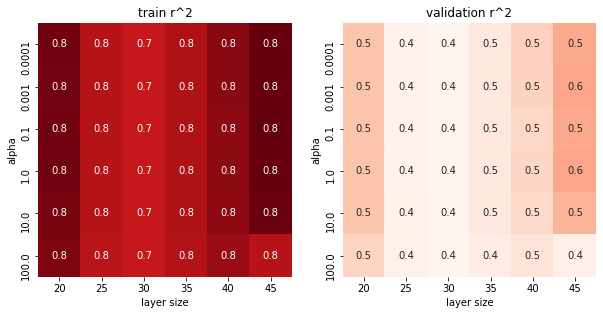

In [140]:
# Trực quan hóa kết quả
train_rr_df = pd.DataFrame(data=np.array(train_rr).reshape(len(alphas), -1),
                             index=alphas, columns=layer_sizes)
val_rr_df = pd.DataFrame(data=np.array(val_rr).reshape(len(alphas), -1), 
                           index=alphas, columns=layer_sizes)
min_rr = min(min(train_rr), min(val_rr))
max_rr = max(max(train_rr), max(val_rr))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_rr_df, vmin=min_rr, vmax=max_rr, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train r^2'); plt.xlabel('layer size'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_rr_df, vmin=min_rr, vmax=max_rr, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation r^2'); plt.xlabel('layer size'); plt.ylabel('alpha');

Nhìn từ biểu đồ trên, ta thấy không có sự tương quan mạnh nào giữa việc tăng giảm số neural và giá trị của $R^2$, khi số neural là 20 và 45 thì giá trị của $R^2$ cao hơn so với khi có các số neural còn lại

Có thể thấy khi sử dụng mô hình mạng neural nhân tạo thì $R^2$ cải thiện rõ rệt, ta hãy xem giá trị cao nhất của $R^2$ là bao nhiêu

In [125]:
best_val_rr

0.5535572858889766

Như vậy $R^2$ > 0.5, mô hình này có thể phù hợp để dự đoán các dữ liệu mới.


Cuối cùng, ta sẽ huấn luyện lại `full_pipeline` trên `rest_X_df` và `rest_y_sr` (tập huấn luyện + tập validation) với `best_alpha` và `best_layer` tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [142]:
full_pipeline = make_pipeline(column_transformer, MLPRegressor(alpha=best_alpha, hidden_layer_sizes=best_layer,
                                                               activation='relu', solver='adam', random_state=0, max_iter=10000))
full_pipeline.fit(rest_X_df, rest_y_sr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['category',
                                                   'shop_location']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['item_public_time',
                                                   'item_be_got_time',
                                                   'sell_time', 'discount',
                                                   'options', 'rating_star',
                                                   'five_star', 'four_star',
                                                   'three_star', 'two_star',
                                                   'one_star', 'price_min',
                                                   'price_min_before_discount',
                                                   'price_max',
                                                   'price_max_before_discount',
                                                   'price',
                                                   'price_before_discount',
                                                   'liked_count', 'view_count',
                                                   'cmt_count',
                                                   'is_preferred_plus_seller',
                                                   'images'])])),
                ('mlpregressor',
                 MLPRegressor(alpha=0.001, hidden_layer_sizes=45,
                              max_iter=10000, random_state=0))])

## Đánh giá mô hình tìm được

Sau khi đã có mô hình tốt nhất fit vào tập train, ta sẽ dùng mô hình đó để dự đoán tập test cuối cùng

In [144]:
compute_rr(test_y_sr, full_pipeline.predict(test_X_df), baseline_preds)

0.7094360643532869